In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


'\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

In [2]:
data  = pd.read_csv('data/data.csv')

In [3]:
data.head()

name  year  \
0                           Mambo No 5  1950   
1                       Que Rico Mambo  1950   
2  Cherry Pink and Apple Blossom White  1950   
3                          Mambo Jambo  1950   
4                          Mambo No. 8  1950   

                                                 url                     uri  \
0  https://open.spotify.com/track/3fQLXoRwKQTnThn...  3fQLXoRwKQTnThncdMCqwG   
1  https://open.spotify.com/track/1uwSOYXZoxgSqhn...  1uwSOYXZoxgSqhn8FIkfH1   
2  https://open.spotify.com/track/0xgulEfXsdV2fyl...  0xgulEfXsdV2fyl8i5OF6O   
3  https://open.spotify.com/track/6AG5jVPwROJ3Vp2...  6AG5jVPwROJ3Vp2C0mETvN   
4  https://open.spotify.com/track/1zj2Tu2goqddyco...  1zj2Tu2goqddycoNosJZGz   

   explicit genre       artist              artist_uri  artist_popularity  \
0     False   pop  Pérez Prado  1ZKhPkCXXgtiGgALn4OYtT                 48   
1     False   pop  Pérez Prado  1ZKhPkCXXgtiGgALn4OYtT                 48   
2     False   pop  Pérez Prado  1ZKhPkCXXgtiGgALn4OYtT                 48   
3     False   pop  Pérez Prado  1ZKhPkCXXgtiGgALn4OYtT                 48   
4     False   pop  Pérez Prado  1ZKhPkCXXgtiGgALn4OYtT                 48   

         artist_genres  ...  mode  speechiness  acousticness  \
0  mambo,space age pop  ...     0       0.3400         0.360   
1  mambo,space age pop  ...     1       0.1130         0.621   
2  mambo,space age pop  ...     1       0.0430         0.556   
3  mambo,space age pop  ...     1       0.0492         0.645   
4  mambo,space age pop  ...     0       0.0995         0.466   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.75300    0.0358    0.807  180.624       156975               4   
1           0.00168    0.1410    0.544  106.879       236227               4   
2           0.81600    0.0986    0.726  118.424       183843               4   
3           0.83900    0.1380    0.914  121.305       190147               4   
4           0.00190    0.1530    0.840  142.451       165893               4   

   track_popularity  
0                41  
1                33  
2                32  
3                29  
4                30  

[5 rows x 24 columns]

In [4]:
data.columns

Index(['name', 'year', 'url', 'uri', 'explicit', 'genre', 'artist',
       'artist_uri', 'artist_popularity', 'artist_genres', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'track_popularity'],
      dtype='object')

In [22]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data, x='year', y=sound_features,title='Year Vs Sound Features')
fig.show()


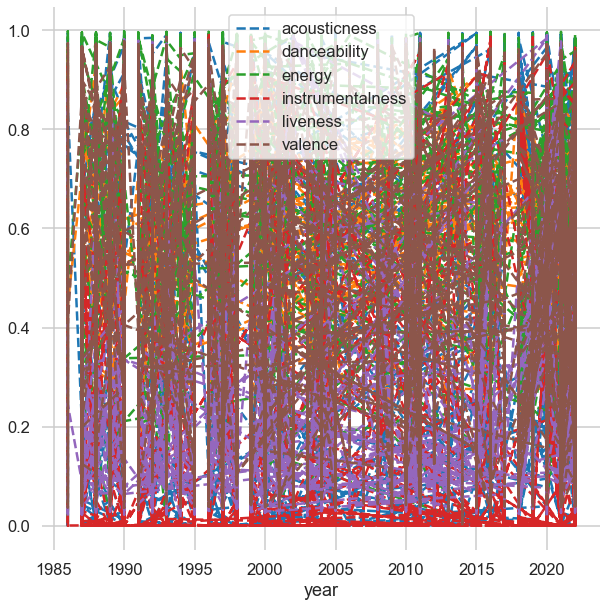

In [38]:
zerotoone = data[['acousticness', 'danceability',
                    'energy', 'instrumentalness',
                    'liveness', 'valence','year']]
df = zerotoone.copy()
dfn = df[df.year > 1985]
dfn =dfn.reset_index(drop=True)
dfn.set_index('year',inplace=True)

sns.set_style('whitegrid')
dfn.plot(figsize=(10,10),style='--')
sns.despine(left = True,bottom=True)

<AxesSubplot:xlabel='mode', ylabel='count'>

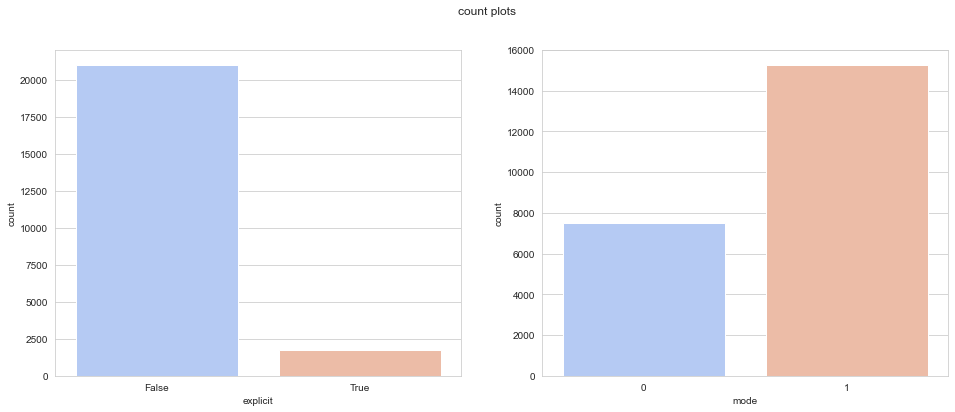

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('count plots')

sns.countplot(ax=axes[0],x='explicit',data=data,palette='coolwarm')
sns.countplot(ax=axes[1],x='mode',data=data,palette='coolwarm')

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

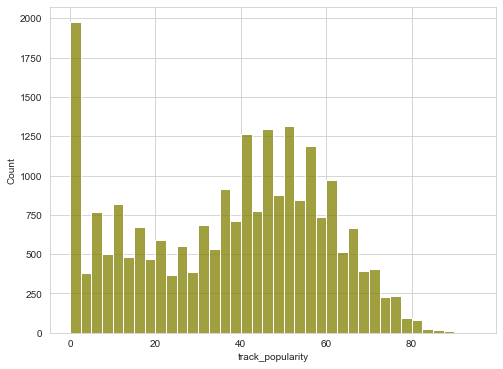

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(x='track_popularity',data=data,color="olive")

In [29]:
df = data[data['track_popularity']>85][['name','artist','track_popularity','year','time_signature']]
fig = px.scatter(df,x='year', y='track_popularity',color='name',size='time_signature')
fig.show()

<AxesSubplot:>

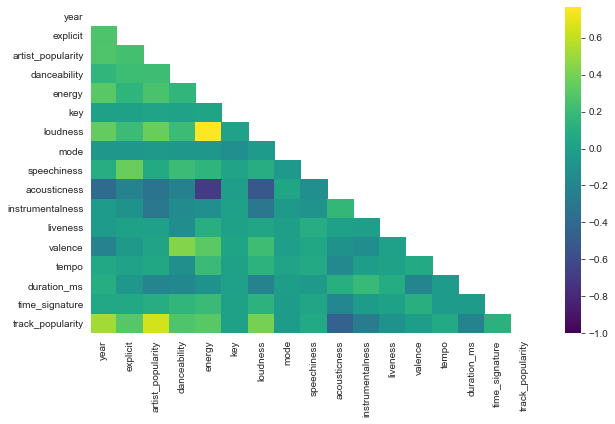

In [30]:
plt.figure(figsize=(10,6))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

In [31]:
corr[abs(corr['track_popularity']) > 0.25]['track_popularity']

year                 0.520559
explicit             0.298563
artist_popularity    0.646139
danceability         0.280084
energy               0.307038
loudness             0.396140
acousticness        -0.456176
instrumentalness    -0.273371
track_popularity     1.000000
Name: track_popularity, dtype: float64

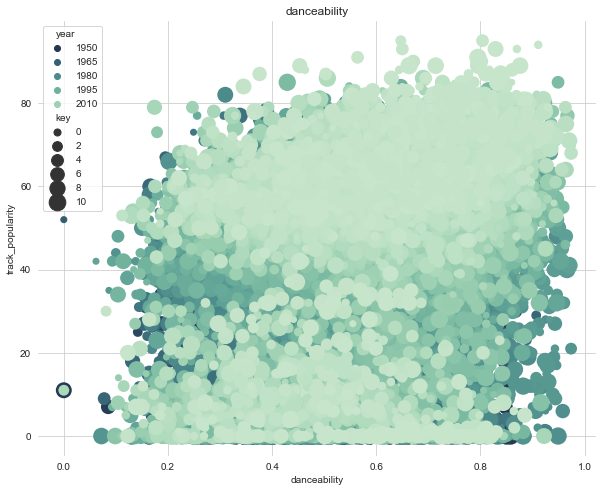

In [32]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.scatterplot(x="danceability", y="track_popularity",
                hue="year", size="key",
                palette="ch:r=-.4,d=.2_r",
                sizes=(50, 300), linewidth=0,
                data=data,legend=True).set(title='danceability')
sns.despine(left = True,bottom=True)

In [33]:
post = data[data['artist'].str.contains('Christina Aguilera')]
ed = data[data['artist'].str.contains('Ed Sheeran')]
kw = data[data['artist'].str.contains('Doris Day')]
dra = data[data['artist'].str.contains('Drake')]
cb = data[data['artist'].str.contains('Chris Brown')]

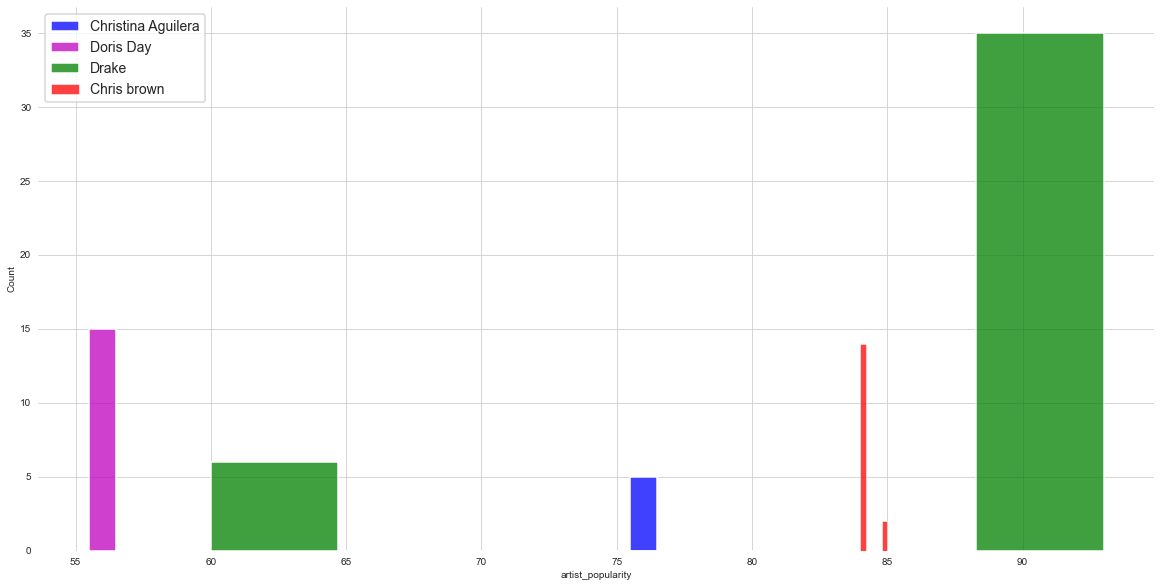

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("talk",font_scale=1, rc={"lines.linewidth": 2.5})

sns.histplot(post['artist_popularity'], color='b',label="Christina Aguilera")
sns.histplot(ed['artist_popularity'], color='b',label="Ed Sheeran")
sns.histplot(kw['artist_popularity'], color='m',label="Doris Day")
sns.histplot(dra['artist_popularity'], color='g',label="Drake")
sns.histplot(cb['artist_popularity'], color='r',label="Chris brown")

ax.legend(fontsize = 14)

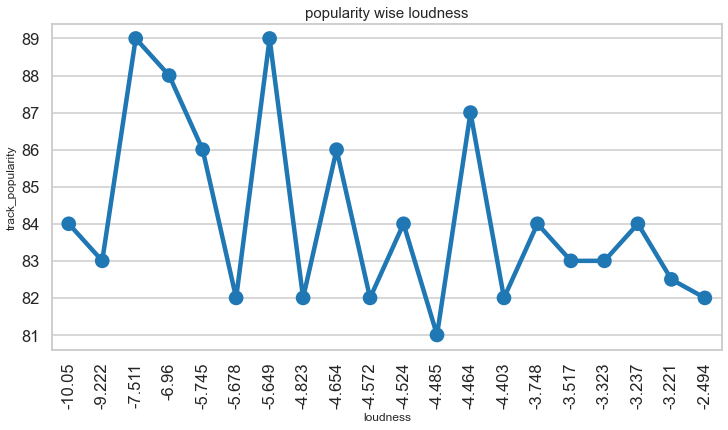

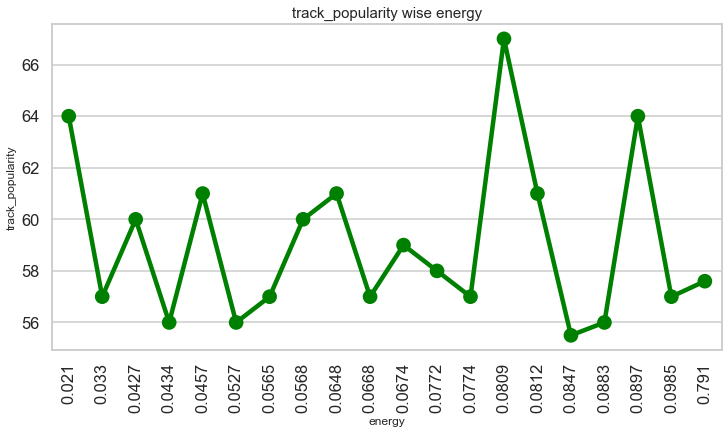

In [35]:
ld = data.groupby("loudness")["track_popularity"].mean().sort_values(ascending=False).head(20).reset_index()
ac = data.groupby("acousticness")["track_popularity"].mean().sort_values(ascending=False).head(20).reset_index()
en = data.groupby("energy")["track_popularity"].mean().sort_values(ascending=False).head(20).reset_index()
ins = data.groupby("instrumentalness")["track_popularity"].mean().sort_values(ascending=False).head(20).reset_index()


plt.figure(figsize=(12,6))
sns.pointplot(data=ld,x="loudness", y='track_popularity')#,ax=axes[0])
#, color=color[4])
plt.xlabel('loudness', fontsize=12)
plt.ylabel('track_popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=en,x="energy", y='track_popularity',color='g')#,ax=axes[1])
#, color=color[4])
plt.xlabel('energy', fontsize=12)
plt.ylabel('track_popularity', fontsize=12)
plt.title("track_popularity wise energy", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


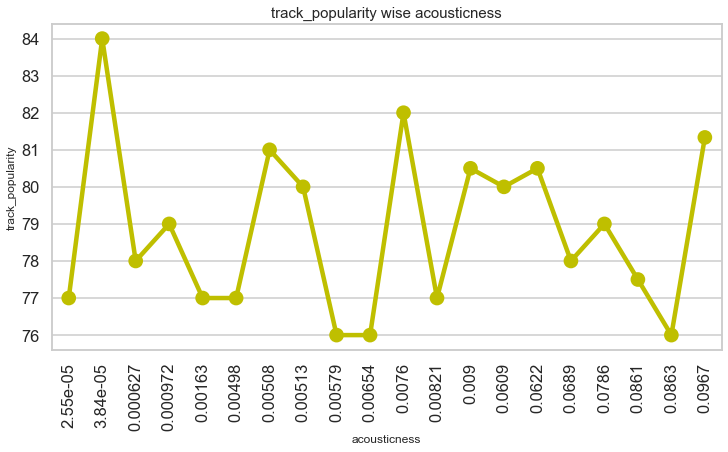

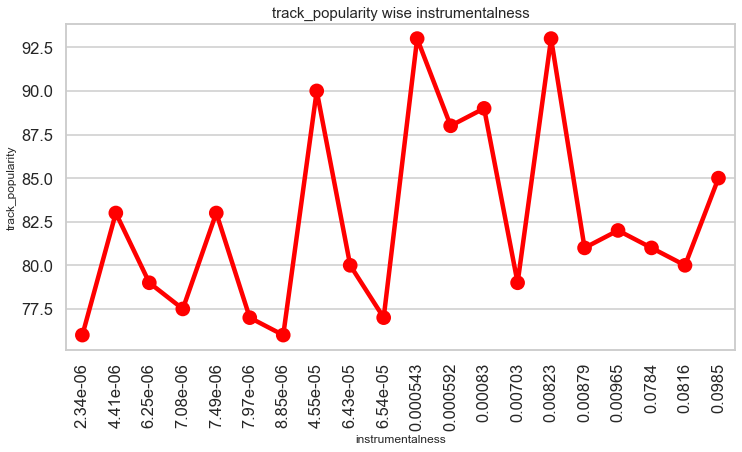

In [36]:
plt.figure(figsize=(12,6))
sns.pointplot(data=ac,x="acousticness", y='track_popularity',color='y')#,ax=axes[0])
#, color=color[4])
plt.xlabel('acousticness', fontsize=12)
plt.ylabel('track_popularity', fontsize=12)
plt.title("track_popularity wise acousticness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12,6))
sns.pointplot(data=ins,x="instrumentalness", y='track_popularity',color='r')#,ax=axes[0])
#, color=color[4])
plt.xlabel('instrumentalness', fontsize=12)
plt.ylabel('track_popularity', fontsize=12)
plt.title("track_popularity wise instrumentalness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
top10_genres = data.nlargest(10, 'track_popularity')

fig = px.bar(top10_genres, x='genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()